In [1]:
import os
import pandas as pd

In [2]:
os.getcwd()

'C:\\Users\\royku\\Sem II Modules'

In [3]:
dat=pd.read_csv("C:\\Users\\royku\\Sem II Modules\\All Used Data\\dm.csv", header = 0, sep = ',')
dat.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id'],
      dtype='object')

In [4]:
dat.head() #Target Variable is AmountSpent

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [5]:
X=dat.drop(['Cust_Id','AmountSpent'],axis=1) #Cust_Id not required column. This is for Indepedent Variables

In [6]:
X=pd.get_dummies(X)

In [7]:
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [8]:
Y = dat['AmountSpent']

In [9]:
import sklearn.model_selection as model_selection

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=200)

In [34]:
import sklearn.tree as tree

reg=tree.DecisionTreeRegressor(max_depth=3)
reg.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3)

In [35]:
reg.score(X_test,Y_test)

0.5915701153457273

In [36]:
reg.feature_importances_

array([0.68060902, 0.        , 0.17771448, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03685946,
       0.04537282, 0.05944422])

In [37]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

Salary            0.680609
Catalogs          0.177714
History_Medium    0.059444
History_Low       0.045373
History_High      0.036859
dtype: float64

In [38]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


data_dir = "C:/Users/royku/Sem II Modules/All Used Data"

os.chdir(data_dir) 

In [39]:
dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,
                         class_names=["0","1"],
                         special_characters=True,
                         proportion=False)

In [40]:
graph = pydotplus.graph_from_dot_data(dot_data) 

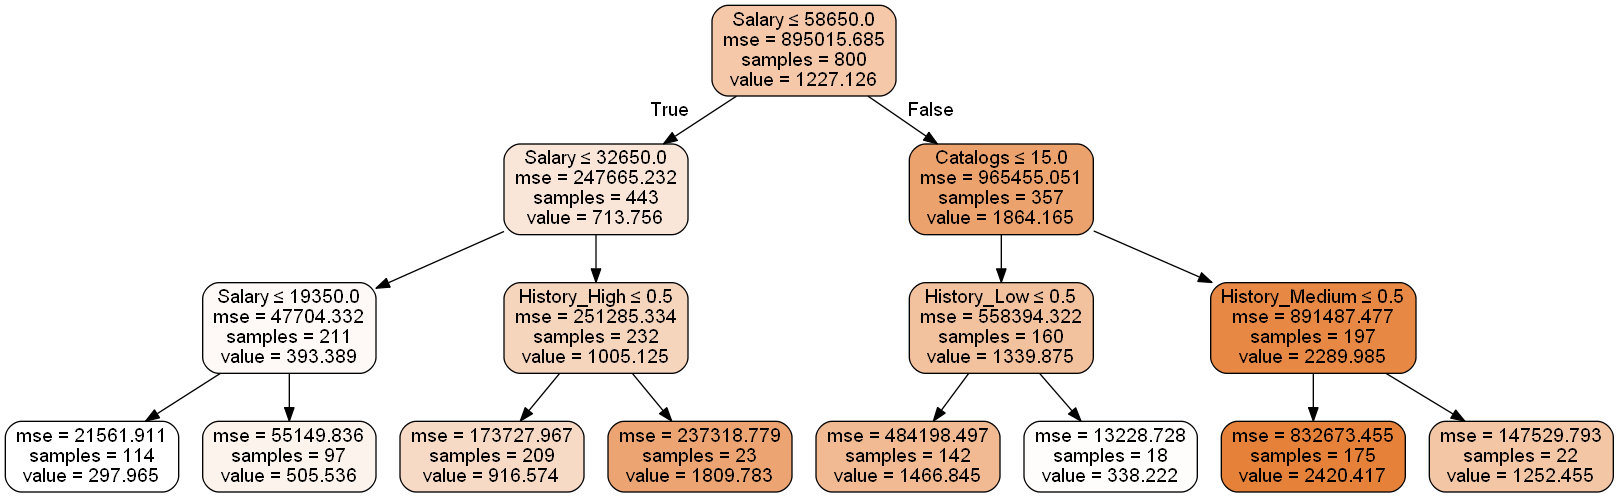

In [41]:
from IPython.display import Image
Image(graph.create_png())

### Grid Search Cross Validation 

In [42]:
#reg=tree.DecisionTreeRegressor(max_depth=3)

print(type(reg))

<class 'sklearn.tree._classes.DecisionTreeRegressor'>


In [43]:
mod=model_selection.GridSearchCV(reg,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=3),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [44]:
mod.best_params_

{'max_depth': 6}

In [45]:
mod.best_estimator_ #Max Depth estimated best at 6

DecisionTreeRegressor(max_depth=6)

In [47]:
mod.best_score_ #Now we are having a better score than what it was coming

0.676282203496086

In [51]:
mod_RG=tree.DecisionTreeRegressor(max_depth=6)

In [52]:
mod_RG.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=6)

In [54]:
mod_RG.score(X_test,Y_test) #Acurracy points

0.7853221712823775

In [66]:
dot_data1 = tree.export_graphviz(mod_RG, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,
                         class_names=["0","1"],
                         special_characters=True,
                         proportion=False)

In [67]:
graph1 = pydotplus.graph_from_dot_data(dot_data1) 

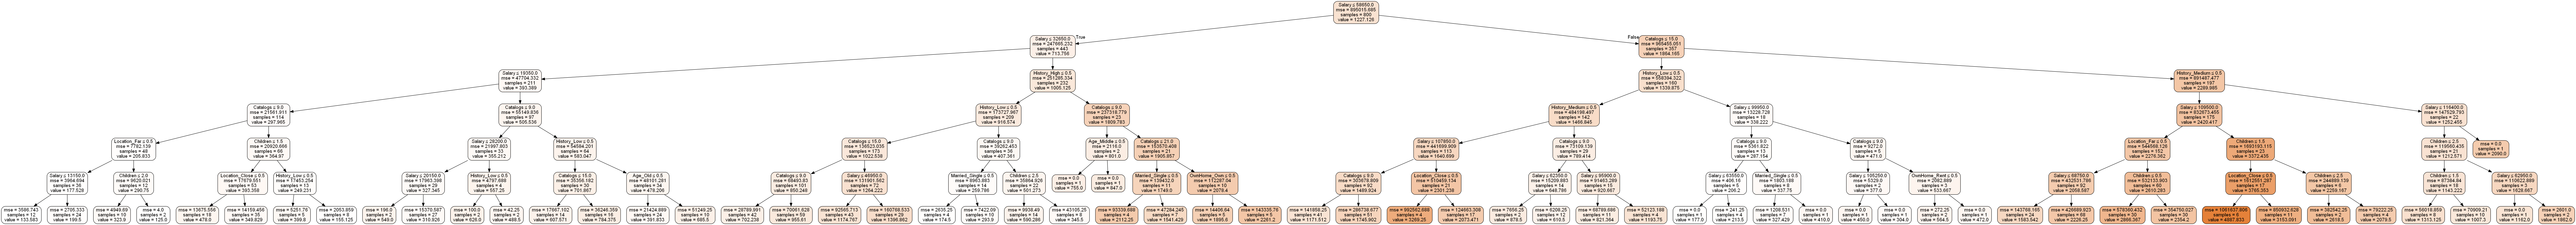

In [68]:
Image(graph1.create_png())